#### Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

use inline to avoid having to always write plt.show()

In [2]:
%matplotlib inline

##### Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv',nrows=6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


##### Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [4]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


##### Look at the shape of each dataframe - how many rows, how many columns. Take a look at the data types for the columns in each table.

In [5]:
internet_df.info()
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


##### Take a look at the last 10 rows of each dataset in turn.

In [6]:
gdp_df[-10:]

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [7]:
internet_df[-10:]

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


##### Drop the 'value footnotes' data (column) from both datasets

In [8]:
internet_df = internet_df.drop('Value Footnotes',1)
gdp_df = gdp_df.drop('Value Footnotes',1)

##### Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’. Also change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [9]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})

##### Merge the two DataFrames to one, keeping all data from each

In [10]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer',on=['Country','Year'])
gdp_and_internet_use = gdp_and_internet_use.reset_index(drop=True)

Check to see that it merged correctly

In [11]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


Look at the last five rows to make sure the data is clean and as expected

In [12]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


##### Subset the combined data frame to keep only the data for 2004, 2009, and 2014

In [13]:
gdp_and_internet_use = gdp_and_internet_use[(gdp_and_internet_use['Year'].isin([2004,2009,2014]))]
gdp_and_internet_use = gdp_and_internet_use.reset_index(drop=True)
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2009,1502.354073,3.550000
2,Afghanistan,2004,1025.208245,0.105809
3,Albania,2014,10700.993216,60.100000
4,Albania,2009,9525.377979,41.200000


##### Create three new data frames, one for 2004, one for 2009, and one for 2014.

In [14]:
gdp_internet_2004 = gdp_and_internet_use[gdp_and_internet_use.Year==2004]
gdp_internet_2009 = gdp_and_internet_use[gdp_and_internet_use.Year==2009]
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use.Year==2014]

##### Which country had the highest percentage of internet users in each of the 3 years?  The lowest?

In [19]:
highInternet = pd.concat([gdp_internet_2014[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].max()],
                   gdp_internet_2009[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].max()],
                   gdp_internet_2004[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].max()]])
lowInternet = pd.concat([gdp_internet_2014[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].min()],
                   gdp_internet_2009[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].min()],
                   gdp_internet_2004[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].min()]])
print(highInternet)
print(lowInternet)

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16
272  Iceland  2009    41505.084834               93.00
627   Sweden  2004    40177.850408               83.89
                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
744  Dem. People's Rep. of Korea  2014             NaN                 0.0
745  Dem. People's Rep. of Korea  2009             NaN                 0.0
746  Dem. People's Rep. of Korea  2004             NaN                 0.0


##### Which country had the highest and lowest gdp per capita in 2014? What was the gdp per capita?

In [22]:
highLowGDP = pd.concat([gdp_internet_2014[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].max()],
                        gdp_internet_2014[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].min()]])
print(highLowGDP)

                      Country  Year  GDP_Per_Capita  Internet_Users_Pct
385          Macao SAR, China  2014   130439.106674                 NaN
107  Central African Republic  2014      672.681648                 NaN


##### Create scatterplots for each of the 3 years of Internet vs GDP Per Capita. Are there differences across years? What do the plots tell you about any relationship between these two variables?

The relationship between internet usage and GDP become stronger between '04 and '14, with very few countries having low internet use but high GDP by 2014

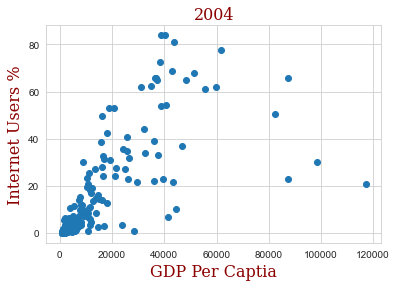

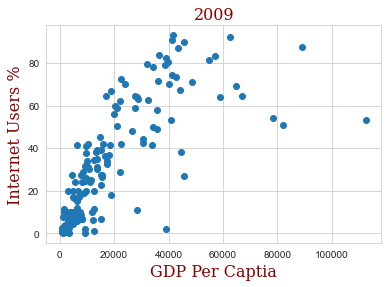

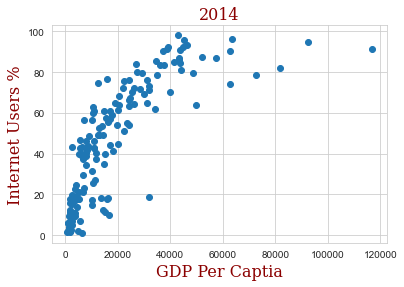

In [31]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(gdp_internet_2004['GDP_Per_Capita'],gdp_internet_2004['Internet_Users_Pct'])
plt.title('2004', fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()
plt.scatter(gdp_internet_2009['GDP_Per_Capita'],gdp_internet_2009['Internet_Users_Pct'])
plt.title('2009',fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()
plt.scatter(gdp_internet_2014['GDP_Per_Capita'],gdp_internet_2014['Internet_Users_Pct'])
plt.title('2014',fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()

##### Look at the distribution of gdp per capita values for 2014. Is it unimodal?
2014 GDP Per Captia distribution is unimodal, with the only peak being in the lowest GDP bucket

C:\Users\aaron\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aaron\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'GDP Per Capita')

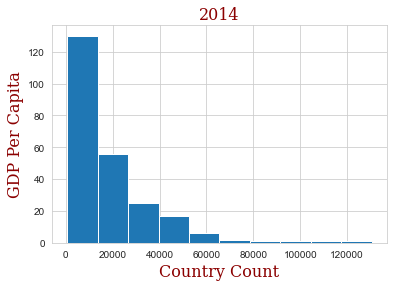

In [32]:
plt.hist(gdp_internet_2014['GDP_Per_Capita'])
plt.title('2014',fontdict = font)
plt.xlabel('Country Count', fontdict = font)
plt.ylabel('GDP Per Capita',fontdict = font)

##### Look at the distribution of Internet Use for 2014. Is it unimodal?
2014 Internet Usage Pct is not unimodal because there is a peak in both the 0-20% buckets and at 40-50% bucket

Text(0, 0.5, 'Internet Users %')

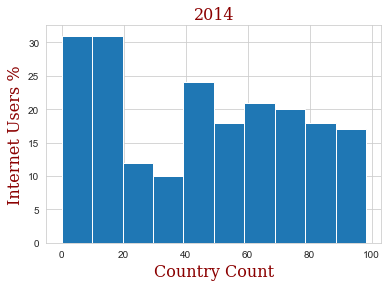

In [33]:
plt.hist(gdp_internet_2014['Internet_Users_Pct'])
plt.title('2014',fontdict = font)
plt.xlabel('Country Count', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)

##### What are the top 5 countries in terms of internet use in 2014?

In [34]:
print(gdp_internet_2014.nlargest(5,'Internet_Users_Pct'))

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16
725  Bermuda  2014             NaN               96.80
480   Norway  2014    63328.259526               96.30
149  Denmark  2014    45057.083449               95.99
719  Andorra  2014             NaN               95.90


##### Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries.

In [35]:
largestUserPct = gdp_internet_2014.nlargest(5,'Internet_Users_Pct')
top_5_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(largestUserPct['Country'])]
top_5_internet = top_5_internet.sort_values(['Country','Year'])
top_5_internet = top_5_internet.reset_index(drop=True)
print(top_5_internet)

    Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Andorra  2004             NaN           26.837954
1   Andorra  2009             NaN           78.530000
2   Andorra  2014             NaN           95.900000
3   Bermuda  2004    55452.638880           60.990867
4   Bermuda  2009    57151.919132           83.250000
5   Bermuda  2014             NaN           96.800000
6   Denmark  2004    43670.446201           80.930000
7   Denmark  2009    43382.615688           86.840000
8   Denmark  2014    45057.083449           95.990000
9   Iceland  2004    38893.378798           83.880000
10  Iceland  2009    41505.084834           93.000000
11  Iceland  2014    42774.888849           98.160000
12   Norway  2004    61612.275634           77.690000
13   Norway  2009    62617.153609           92.080000
14   Norway  2014    63328.259526           96.300000


##### Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?
Andorra had the greatest improvement of the top 5 countries from '14. The plotting issue with Bermuda was due to the indices being in the wrong order.  By sorting the values by country and year, and then resetting indices (done in the previous cell), the Bermuda graph shows correctly.

<Figure size 432x288 with 0 Axes>

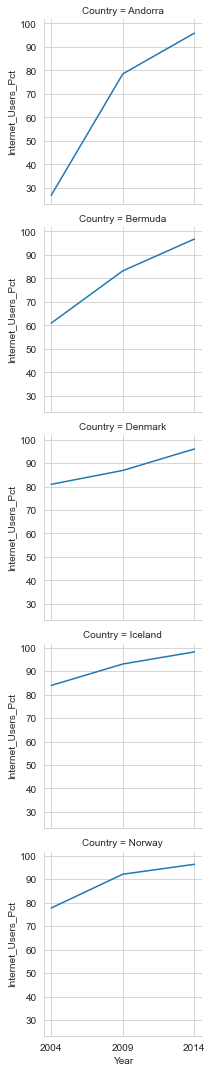

In [36]:
plt.clf()
import seaborn as sns
sns.set_style('whitegrid')
snsfgtop = sns.FacetGrid(top_5_internet, row='Country')
snsfgtop = snsfgtop.map(plt.plot, 'Year','Internet_Users_Pct')
snsfgtop = snsfgtop.set(xticks=[2004,2009,2014])

##### Repeating the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?
North Korea has consistently had 0% internet use

<Figure size 432x288 with 0 Axes>

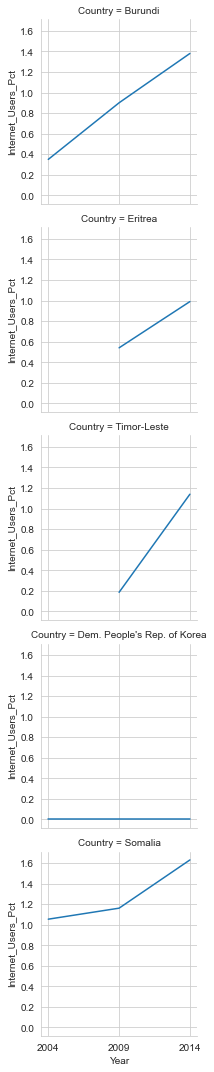

In [37]:
plt.clf()
smallestUserPct = gdp_internet_2014.nsmallest(5,'Internet_Users_Pct')
bottom_5_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(smallestUserPct['Country'])]
sns.set_style('whitegrid')
snsfgbot = sns.FacetGrid(bottom_5_internet, row='Country')
snsfgbot = snsfgbot.map(plt.plot, 'Year','Internet_Users_Pct')
snsfgbot = snsfgbot.set(xticks=[2004,2009,2014])
plt.show(snsfgbot)

##### Repeat the same steps above for both largest and smallest 2014 GDP countries

<Figure size 432x288 with 0 Axes>

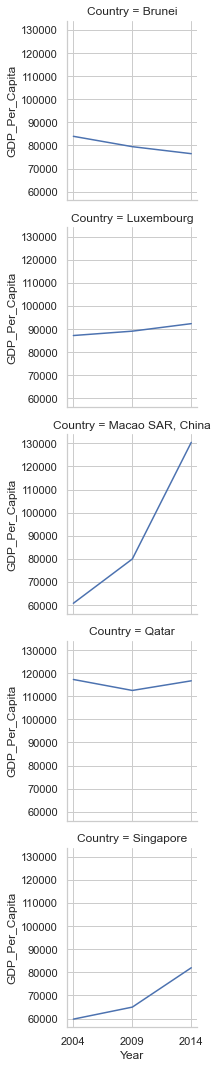

In [55]:
plt.clf()
largestGDP = gdp_internet_2014.nlargest(5,'GDP_Per_Capita')
top_5_GDP = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(largestGDP['Country'])]
top_5_GDP = top_5_GDP.sort_values(['Country','Year'])
top_5_GDP = top_5_GDP.reset_index(drop=True)
sns.set_style('whitegrid')
snsfgtgdp = sns.FacetGrid(top_5_GDP, row='Country')
snsfgtgdp = snsfgtgdp.map(plt.plot, 'Year','GDP_Per_Capita')
snsfgtgdp = snsfgtgdp.set(xticks=[2004,2009,2014])
plt.show(snsfgtgdp)

<Figure size 432x288 with 0 Axes>

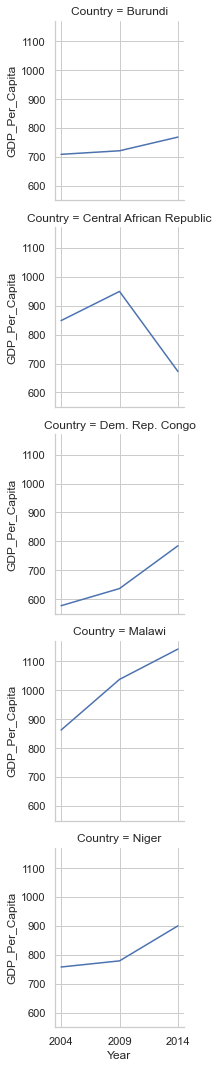

In [56]:
plt.clf()
smallestGDP = gdp_internet_2014.nsmallest(5,'GDP_Per_Capita')
bot_5_GDP = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(smallestGDP['Country'])]
bot_5_GDP = bot_5_GDP.sort_values(['Country','Year'])
bot_5_GDP = bot_5_GDP.reset_index(drop=True)
sns.set_style('whitegrid')
snsfgbgdp = sns.FacetGrid(bot_5_GDP, row='Country')
snsfgbgdp = snsfgbgdp.map(plt.plot, 'Year','GDP_Per_Capita')
snsfgbgdp = snsfgbgdp.set(xticks=[2004,2009,2014])
plt.show(snsfgbgdp)

##### Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?
The biggest standout from this data is Macao SAR, China more than doubling its GDP per capita in a decade.  China's easing on travel restrictions and the liberalisation of Macau's gaming industry seemed to have driven a lot of that growth.